# Exploratory Data Analysis of NBA Player Performance and Twitter Metrics

# Dataset Description

The dataset I used for this project is from the Kaggle data repository (https://www.kaggle.com/noahgift/social-power-nba). The dataset is titled "Social Power NBA" and contains performance, salary, and twitter data for 100 NBA players of the 2016-2017 season. 

### Problem Statement
The social aspect of the NBA is arguably the most prominent of the major American sports. Including twitter data in this dataset with performance and salary statistics, allows for a more holistic view of a players impact on an organization. In a game where chemistry is tantamount and determining the appropriate salary based on the impact of a player is vital to assess personnel changes within a team, this dataset can provide the a subset of these data (100 player cross section of the NBA) to elucidate these relationships. 

Do players make more money because they have a stronger twitter following or does increased social activity result in poor performance due to off-court distractions? Ultimately, how can the on and off court impact of a player be valued for management to make better decisions in terms of winning, who to play, and how much to pay them?

In [19]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load NBA dataset
nba = pd.read_csv("~/Documents/UW Data Science Certificate/Methods for Data Analysis/nba_2016_2017_100.csv")

# Examine the data

In taking a first look at the data, I obtained the shape and datatypes of the dataset. Next, I print out the first five rows of the data to get an idea for how the table is structured. Then, I listed the columns for reference and calculated the summary statistics for each column in the dataset.

In [178]:
# Print the shape and datatypes of the dataset
print(nba.shape)
print(nba.dtypes)
# Get the first five rows of the dataset
nba.head()
# List the column names in the dataset
nba.columns
# Get the summary statistics for the nba dataset
nba.describe()

(100, 66)
PLAYER_ID                             int64
PLAYER_NAME                          object
TEAM_ID                               int64
TEAM_ABBREVIATION                    object
AGE                                   int64
GP                                    int64
W                                     int64
L                                     int64
W_PCT                               float64
MIN                                 float64
OFF_RATING                          float64
DEF_RATING                          float64
NET_RATING                          float64
AST_PCT                             float64
AST_TO                              float64
AST_RATIO                           float64
OREB_PCT                            float64
DREB_PCT                            float64
REB_PCT                             float64
TM_TOV_PCT                          float64
EFG_PCT                             float64
TS_PCT                              float64
USG_PCT               

,PLAYER_ID,TEAM_ID,AGE,GP,W,L,W_PCT,MIN,OFF_RATING,DEF_RATING,...,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,CFID,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS,counts
count,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.0
mean,3.026027e+05,1.610613e+09,27.510000,62.440000,33.020000,29.420000,0.507010,26.391000,107.728000,105.946000,...,138.350000,110.350000,128.700000,133.120000,5.0,11.290120,15.174200,0.930000,1.516579,1.0
std,4.237828e+05,8.788445e+00,3.935066,21.261869,15.421342,12.726478,0.159991,9.221222,5.157324,4.165889,...,136.383919,112.122171,129.410591,94.382553,0.0,8.789342,7.319374,0.256432,4.345148,0.0
min,1.717000e+03,1.610613e+09,20.000000,2.000000,0.000000,1.000000,0.000000,3.300000,86.800000,93.000000,...,1.000000,1.000000,1.000000,1.000000,5.0,0.310000,1.500000,0.000000,0.000000,1.0
25%,2.011780e+05,1.610613e+09,25.000000,55.500000,22.750000,21.000000,0.416000,19.450000,104.275000,103.625000,...,28.750000,28.750000,28.750000,47.000000,5.0,2.842500,9.225000,1.000000,0.048000,1.0
50%,2.023305e+05,1.610613e+09,27.000000,72.000000,35.000000,30.500000,0.506500,29.700000,107.150000,106.000000,...,82.000000,68.000000,70.500000,132.000000,5.0,10.820000,14.550000,1.000000,0.244000,1.0
75%,2.034582e+05,1.610613e+09,30.000000,77.000000,43.250000,37.250000,0.626250,33.900000,110.275000,108.525000,...,217.250000,163.000000,188.500000,198.500000,5.0,18.400000,20.650000,1.000000,0.857750,1.0
max,1.627848e+06,1.610613e+09,39.000000,82.000000,65.000000,55.000000,0.824000,37.800000,124.200000,118.300000,...,484.000000,465.000000,483.000000,355.000000,5.0,30.960000,31.600000,1.000000,37.000000,1.0


# Observation 1: Salary is highly correlated with points per game and Twitter followers. Wins and points per game also have a strong relationship

Using a correlation matrix, I looked into a few potential relationships in this dataset. I created a correlation matrix with the following attributes: Wins, Points per game, Age, Offensive Rating, Defensive Rating, Salary (millions), and Twitter Followers (millions). 


I plotted these correlations as a heatmap and there are some notable relationships such as the strong correlation between Points per Game and Salary, Points per Game and Wins, and Twitter Followers and Salary. These correlations suggest that players get paid more for scoring and in turn have a stronger following on Twitter due to their impact on their teams performance.

In [167]:
# Generate a correlation matrix from the dataset
nba_corr = nba[['W', 'PTS', 'AGE', 'OFF_RATING', 'DEF_RATING', 'SALARY_MILLIONS', 'TWITTER_FOLLOWER_COUNT_MILLIONS']].corr()
# Print the correlation matrix
nba_corr


,W,PTS,AGE,OFF_RATING,DEF_RATING,SALARY_MILLIONS,TWITTER_FOLLOWER_COUNT_MILLIONS
W,1.000000,0.475038,0.203069,0.422244,-0.253202,0.391831,0.250282
PTS,0.475038,1.000000,-0.031333,0.271257,-0.004879,0.647343,0.327236
AGE,0.203069,-0.031333,1.000000,-0.104785,-0.266586,0.301526,0.245081
OFF_RATING,0.422244,0.271257,-0.104785,1.000000,0.039845,0.188706,0.265210
DEF_RATING,-0.253202,-0.004879,-0.266586,0.039845,1.000000,-0.035141,-0.046075
SALARY_MILLIONS,0.391831,0.647343,0.301526,0.188706,-0.035141,1.000000,0.443932
TWITTER_FOLLOWER_COUNT_MILLIONS,0.250282,0.327236,0.245081,0.265210,-0.046075,0.443932,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

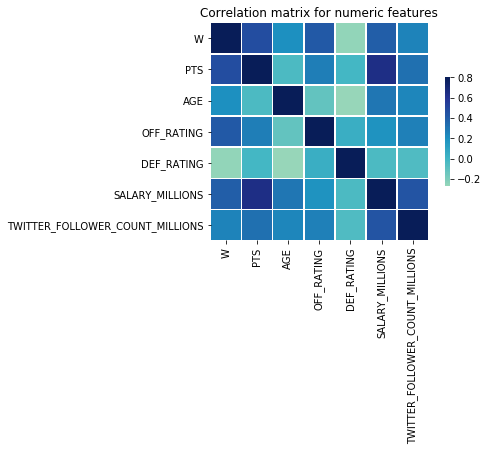

In [168]:
# Generate a heat map based on the correlation matrix created above
sns.heatmap(nba_corr, vmax=.8, center=0,
            square=True, cmap = "YlGnBu", linewidths=.25, cbar_kws={"shrink": .5})
plt.title('Correlation matrix for numeric features in the NBA Social Power dataset') # make a plot title
plt.yticks(rotation='horizontal') # rotate y tick marks
plt.xticks(rotation='vertical') # rotate x tick marks

# Observation 2: Strong relationship observed between wins and field goals attempted

I found that one of the stronger relationships was between Wins and Field Goals Attempted. The strong positive correlation between these two variables suggests that the more field goal attempts taken by a player results in more wins for their team. In some ways this makes sense, with more shot attempts resulting in more points and ultimately a higher chance of winning. However, from a coaching perspective, it's usually emphasized to have better shot selection in taking more high percentage shots. These data alone may decieve a player into just generally shooting more because the attempts correlate with wins.

In [1]:
# Scatter plot of wins vs field goals attempted
import seaborn as sns
sns.lmplot(x = 'W', y = 'FGA', 
           data = nba, 
           palette="hls", 
           scatter_kws={'alpha':0.3},
           fit_reg = True)
plt.xlabel('Wins') # Label the x axis
plt.ylabel('Field Goal Attempts') # Label the y axis
plt.title('Wins vs. Field Goal Attemps') # Give plot a title

NameError: name 'salary_wiki_twitter' is not defined

# Observation 3

Looking at the relationship between Salary and Minutes per Game elucidates a few groups of contract types. In the hexbin plot below, there are two major pockets of data. There are quite a few players in the bottom left corner of the plot in which players are playing 5 minutes or less per game but they are still making at least 10 million. The other pocket of data is in the upper right hand corner of the plot, where players are making over 30 million dollars and are playing at least 15 minutes per game. 

The trend observed in the upper part of the plot, where players are making more money and playing more minutes, is expected. From a management standpoint, you don't want to pay players a high salary and not play them. However, this concept is what makes the bottom left part of the plot more interesting. Why are players getting paid at least 10 million dollars but are not playing many minutes at all? This could be the result of the high minimum salary that the NBA has. However, this trend looks like it would be something worth looking into. Are organizations overvaluing these players? If so, based on what metrics?

Text(0.5,0,'Minutes per Game')

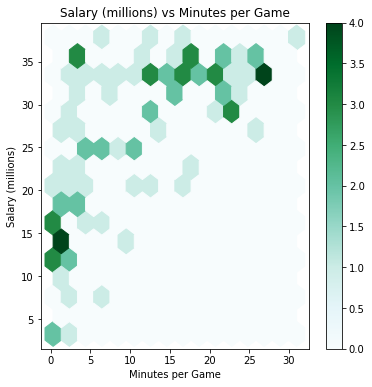

In [173]:
# Generate hexbin plot comparing Salary and minutes per game
ax = plt.figure(figsize=(6, 6)).gca() # define axis
nba.plot.hexbin(x = 'SALARY_MILLIONS', y = 'MIN', gridsize = 15, ax = ax)
ax.set_title('Salary (millions) vs Minutes per Game') # Give the plot a main title
ax.set_ylabel('Salary (millions)')# Label y axis
ax.set_xlabel('Minutes per Game') # Label x axis

# Observation 4

As data continues to be collected at such a high rate in the NBA, the creation of new statistics to describe a players impact are created in order to make more data driven decisions. One of these statistics that is commonly used by NBA.com is called PIE, a metric that measures the percentage of game events (Points, Rebounds, Assists, etc) the player achieved in a game. This metric typically trends with wins (I assessed this correlation below) but I was curious to see if the PIE metric was related to the number of twitter followers a player has. 

Below, the first scatter plot shows that there is a weaker relationship between the PIE rating and wins than I expected. Although the trend still weakly holds, I expected there to be a stronger correlation. 

The second scatter plot displays a relationship between twitter followers and PIE rating but the trend only holds with players with a higher number of twitter followers. These look like outliers that are making the correlation appear better than it really is. The points clustered on left part of the plot are made up with players that have do not have many twitter followers but a variable PIE rating. This trend makes sense because it would be expected to see better players have more Twitter followers and also have a high PIE rating but there also are players who have higher PIE ratings without having as many Twitter followers.

Text(0.5,1,'Twitter Followers vs. PIE Rating')

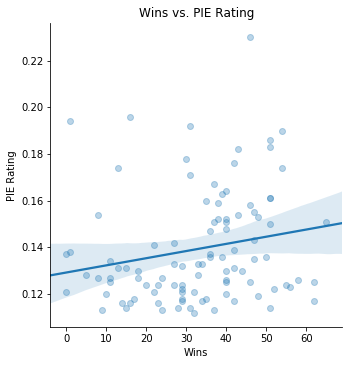

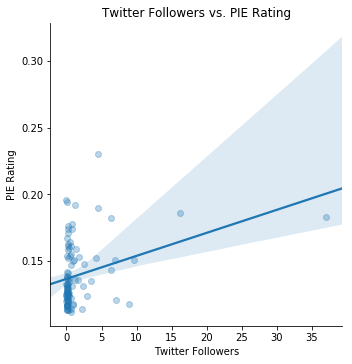

In [175]:
# Scatter Plot comparing wins and PIE rating
import seaborn as sns
sns.lmplot(x = 'W', y = 'PIE', 
           data = nba, 
           palette="hls", 
           scatter_kws={'alpha':0.3},
           fit_reg = True)
plt.xlabel('Wins') # Label x axis
plt.ylabel('PIE Rating') # Label y axis
plt.title('Wins vs. PIE Rating') # Give plot a title

# Scatter Plot
import seaborn as sns
sns.lmplot(x = 'TWITTER_FOLLOWER_COUNT_MILLIONS', y = 'PIE', 
           data = nba, 
           palette="hls", 
           scatter_kws={'alpha':0.3},
           fit_reg = True)
plt.xlabel('Twitter Followers') # Label x axis
plt.ylabel('PIE Rating') # Label y axis
plt.title('Twitter Followers vs. PIE Rating') # Give plot a title



# Summary

In my initial exploration of this dataset, I have identified a few relationships that can build a foundation for further data analysis. My first step was to get a feel for how the data were structured in the table and obtain the summary statistics. Next, I used a heatmap to visualize the high level correlations that I thought would be important in the dataset. 

I used a scatter plot to display the relationship between Field Goal Attempts and Wins. This trend makes sense in terms of having a higher chance of winning but still was interesting to consider how this could affect coaching decisions, especially when coaches typically emphasize good shot selection.

I generated a hexbin plot to look at how the Salary and Minutes per Game may be the result of a high minimum salary in NBA contracts and how this plot can help identify two major groups of players and their contract / playing situations.

Finally, I took a look at one of the newer statistics that has been created to evaluate players, the PIE rating. According to NBA.com, this metric should correlate with wins but I was surprised to see a weak correlation between the two in this dataset. Furthermore, the PIE rating and Twitter Followers relationship seemed to be skewed by a few outliers but can elucidate good players who have less followers on social media and players with similar PIE rating but have fewer twitter followers.

Overall, these trends provide more context to a players impact than just the performance statistics alone. The observations I've laid out above provide a good starting point to dig further into the data and generate predictive models to project a player's impact on a team, trade value, or social impact.